# Label Propagation for Community Detection
This notebook demonstrates the label propagation algorithm, a simple and efficient method for detecting communities in graphs.

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


## Label Propagation Algorithm
Given an undirected graph $G=(V,E)$, we assign each node $i\in V$ a label $L_i^{(t)}$ at iteration $t$.  Starting from initial labels (unique or partial), we iteratively update as:

$$
L_i^{(t+1)} = \arg\max_{\ell} \sum_{j\in N(i)} \mathbf{1}[L_j^{(t)} = \ell]
$$

where $N(i)$ is the neighbor set of node $i$, and $\mathbf{1}[\cdot]$ is the indicator.  Ties are broken randomly or by smallest label.  We repeat until labels no longer change or a maximum number of iterations is reached.

## Implementation in Python
We now implement `label_propagation(G, max_iter=100)` returning the final labels dictionary.

In [17]:
import random

def label_propagation(G, max_iter=100):
    # Initialize each node with its own label
    labels = {n: n for n in G.nodes()}
    for t in range(1, max_iter + 1):
        changed = False
        # traverse nodes in random order
        nodes = list(G.nodes())
        random.shuffle(nodes)
        for i in nodes:
            # tally neighbor labels
            counts = {}
            for j in G.neighbors(i):
                lab = labels[j]
                counts[lab] = counts.get(lab, 0) + 1
            if not counts:
                continue
            # choose the most frequent label (break ties randomly)
            max_count = max(counts.values())
            best = [lab for lab, cnt in counts.items() if cnt == max_count]
            new_label = random.choice(best)
            if new_label != labels[i]:
                labels[i] = new_label
                changed = True
        # if no label changed, we’ve converged
        if not changed:
            return labels, t
    # reached max_iter without full convergence
    return labels, max_iter


## Example 1: Zachary’s Karate Club
Apply label propagation to the standard Karate Club graph.

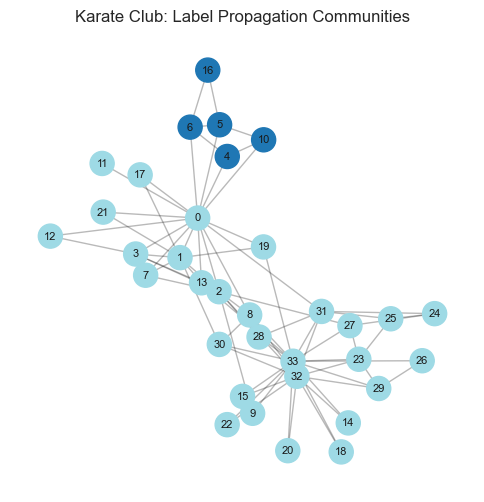

Karate Club: converged in 4 iterations


In [18]:
# Load graph
Gk = nx.karate_club_graph()
# Run algorithm
labels_k, iters_k = label_propagation(Gk)
# Visualize
pos_k = nx.spring_layout(Gk, seed=42)
plt.figure(figsize=(6,6))
nx.draw_networkx_edges(Gk, pos_k, alpha=0.3)
nx.draw_networkx_nodes(Gk, pos_k, nodelist=labels_k.keys(),
    node_color=[labels_k[n] for n in Gk.nodes()], cmap='tab20',
    node_size=300)
nx.draw_networkx_labels(Gk, pos_k, font_size=8)
plt.title('Karate Club: Label Propagation Communities')
plt.axis('off')
plt.show()
print(f"Karate Club: converged in {iters_k} iterations")


## Example 2: Random Graph
Test on an Erdős–Rényi random graph with 50 nodes and $p=0.05$.

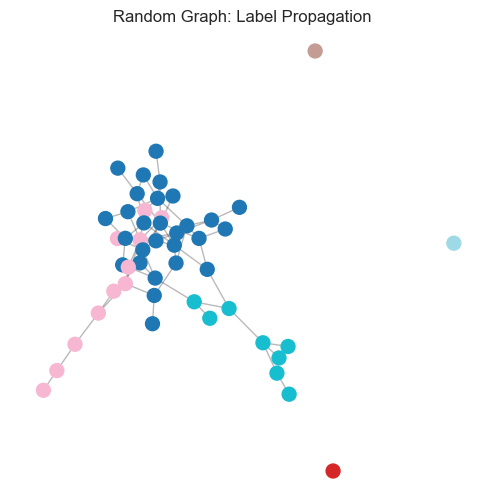

Random graph: converged in 20 iterations


In [19]:
Gr = nx.erdos_renyi_graph(50, 0.05, seed=1)
labels_r, iters_r = label_propagation(Gr)
pos_r = nx.spring_layout(Gr, seed=1)
plt.figure(figsize=(6,6))
nx.draw_networkx_edges(Gr, pos_r, alpha=0.3)
nx.draw_networkx_nodes(Gr, pos_r,
    node_color=[labels_r[n] for n in Gr.nodes()], cmap='tab20',
    node_size=100)
plt.title('Random Graph: Label Propagation')
plt.axis('off')
plt.show()
print(f"Random graph: converged in {iters_r} iterations")



## Discussion
- Label propagation quickly uncovers densely connected communities without heavy computation.
- Convergence is usually fast but not guaranteed; oscillations can occur in symmetric graphs.
- Random tie-breaking and asynchronous updates help avoid non-convergence.
- The number of communities equals the number of unique labels at convergence.
- For semi-supervised use, fix initial labels for some nodes and propagate to infer the rest.